# CNN Image Classification Laboration


Images used in this laboration are from CIFAR 10 (https://en.wikipedia.org/wiki/CIFAR-10). The CIFAR-10 dataset contains 60,000 32x32 color images in 10 different classes. The 10 different classes represent airplanes, cars, birds, cats, deer, dogs, frogs, horses, ships, and trucks. There are 6,000 images of each class. Your task is to make a classifier, using a convolutional neural network, that can correctly classify each image into the correct class.

You need to answer all questions in this notebook. 

## Part 1: What is a convolution

To understand a bit more about convolutions, we will first test the convolution function in scipy using a number of classical filters. 

Convolve the image with Gaussian filter, a Sobel X filter, and a Sobel Y filter, using the function 'convolve2d' in 'signal' from scipy.

https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.convolve2d.html

In a CNN, many filters are applied in each layer, and the filter coefficients are learned through back propagation (which is in contrast to traditional image processing, where the filters are designed by an expert).

In [ ]:
# This cell is finished

from scipy import signal
import numpy as np

# Get a test image
from scipy import misc
image = misc.ascent()

# Define a help function for creating a Gaussian filter
def matlab_style_gauss2D(shape=(3,3),sigma=0.5):
    """
    2D gaussian mask - should give the same result as MATLAB's
    fspecial('gaussian',[shape],[sigma])
    """
    m,n = [(ss-1.)/2. for ss in shape]
    y,x = np.ogrid[-m:m+1,-n:n+1]
    h = np.exp( -(x*x + y*y) / (2.*sigma*sigma) )
    h[ h < np.finfo(h.dtype).eps*h.max() ] = 0
    sumh = h.sum()
    if sumh != 0:
        h /= sumh
    return h

# Create Gaussian filter with certain size and standard deviation
gaussFilter = matlab_style_gauss2D((15,15),4)

# Define filter kernels for SobelX and Sobely
sobelX = np.array([[ 1, 0,  -1],
                    [2, 0, -2],
                    [1, 0, -1]]) 

sobelY = np.array([[ 1, 2,  1],
                    [0, 0, 0],
                    [-1, -2, -1]]) 

In [ ]:
# Perform convolution using the function 'convolve2d' for the different filters
filterResponseGauss = signal.convolve2d(image, gaussFilter)
filterResponseSobelX = signal.convolve2d(image, sobelX)
filterResponseSobelY = signal.convolve2d(image, sobelX)

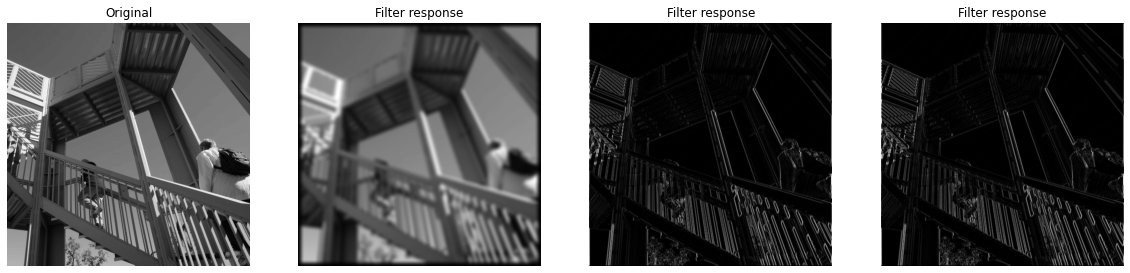

In [ ]:
import matplotlib.pyplot as plt

# Show filter responses
fig, (ax_orig, ax_filt1, ax_filt2, ax_filt3) = plt.subplots(1, 4, figsize=(20, 6))
ax_orig.imshow(image, cmap='gray')
ax_orig.set_title('Original')
ax_orig.set_axis_off()
ax_filt1.imshow(np.absolute(filterResponseGauss), cmap='gray')
ax_filt1.set_title('Filter response')
ax_filt1.set_axis_off()
ax_filt2.imshow(np.absolute(filterResponseSobelX), cmap='gray')
ax_filt2.set_title('Filter response')
ax_filt2.set_axis_off()
ax_filt3.imshow(np.absolute(filterResponseSobelY), cmap='gray')
ax_filt3.set_title('Filter response')
ax_filt3.set_axis_off()

3##  Part 2: Understanding convolutions

Question 1: What do the 3 different filters (Gaussian, SobelX, SobelY) do to the original image?
Ans: 

*   Gussian filter blurs the image
*   SobelX filter inhance the image in horizontal axis i.e. detect egdes of the image on X axis
*   SobelY filter inhance the image in vertical axis i.e. detect egdes of the image on Y axis

Question 2: What is the size of the original image? How many channels does it have? How many channels does a color image normally have?

*   The height and width of image is (512 x 512)
*   The channel of image is 1
*   The typical image has 3 channels, which represent Red, Green and Blue channels

Question 3: What is the size of the different filters?

*   Gussian filter has size of (15 x 15)
*   SobelX and SebelY has size of (3 x 3)

Question 4: What is the size of the filter response if mode 'same' is used for the convolution ?

*   If we use the 'same'. The dimention of output will be same as the input image i.e. (512 x 512), and will be centered with respect to the ‘full’ output.
*   We can get the dimention by running the following command. 

Question 5: What is the size of the filter response if mode 'valid' is used for the convolution? How does the size of the valid filter response depend on the size of the filter? 

*   If we use the 'valid'. The dimention of output will consist only of those elements which do not relay on zero-padding
*   The output in our case will be (498 x 498)
*   We can get the dimention by running the following command. 

Question 6: Why are 'valid' convolutions a problem for CNNs with many layers?

*   The reason that valid convolutions can be a problem is that whenever we convolve the image with valid parameter. The image size is decerased. And for many layers you run out of pixels  




In [ ]:
# Your code for checking sizes of image and filter responses

print('size after convolvution using same option', signal.convolve2d(image, gaussFilter, 'same').shape)

temp = image
print('orignal size of image = ', temp.shape)

for x in range(9):
  temp = signal.convolve2d(temp, gaussFilter, 'valid')
  print('size after convolvution using valid option = ', temp.shape)



size after convolvution using same option (512, 512)
orignal size of image =  (512, 512)
size after convolvution using valid option =  (498, 498)
size after convolvution using valid option =  (484, 484)
size after convolvution using valid option =  (470, 470)
size after convolvution using valid option =  (456, 456)
size after convolvution using valid option =  (442, 442)
size after convolvution using valid option =  (428, 428)
size after convolvution using valid option =  (414, 414)
size after convolvution using valid option =  (400, 400)
size after convolvution using valid option =  (386, 386)


##  Part 3: Get a graphics card

Skip this part if you run on a CPU (recommended)

Let's make sure that our script can see the graphics card that will be used. The graphics cards will perform all the time consuming convolutions in every training iteration.

In [ ]:
import os
import warnings

# Ignore FutureWarning from numpy
warnings.simplefilter(action='ignore', category=FutureWarning)

import keras.backend as K
import tensorflow as tf

#os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID";
 
# The GPU id to use, usually either "0" or "1";
#os.environ["CUDA_VISIBLE_DEVICES"]="0";

# Allow growth of GPU memory, otherwise it will always look like all the memory is being used
#physical_devices = tf.config.experimental.list_physical_devices('GPU')
#tf.config.experimental.set_memory_growth(physical_devices[0], True) 

##  Part 4: How fast is the graphics card?

Question 7: Why are the filters used for a color image of size 7 x 7 x 3, and not 7 x 7 ? 

*   The color image has typically 3 channels one for red, one gree and one for blue. For convolving all the channels we need a filter with 3 dimentions and therefore the filter used will be 7 x 7 x 3 rather then 7 x 7 

Question 8: What operation is performed by the 'Conv2D' layer? Is it a standard 2D convolution, as performed by the function signal.convolve2d we just tested?

*   The Conv2D layer is a 2D Convolution Layer, it creates a convolution kernel that convolved with the layer input to produce a tensor of outputs. 

Question 9: Do you think that a graphics card, compared to the CPU, is equally faster for convolving a batch of 1,000 images, compared to convolving a batch of 3 images? Motivate your answer.
* the ain difference between cpu and gpu is that cup is designed for completing the tasks at wider range, where else gpu is designed to quick rendering of graphics. And gpu does that concurrently. Therefore in my openion gpu is on same level as cpu because there are firstly gpu enables parallelism which is core thing to do for efficient/ faster processing. 

##  Part 5:  Load data
Time to make a 2D CNN. Load the images and labels from keras.datasets, this cell is already finished.

In [ ]:
from keras.datasets import cifar10
import numpy as np

classes = ['plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

# Download CIFAR train and test data
(Xtrain, Ytrain), (Xtest, Ytest) = cifar10.load_data()

print("Training images have size {} and labels have size {} ".format(Xtrain.shape, Ytrain.shape))
print("Test images have size {} and labels have size {} \n ".format(Xtest.shape, Ytest.shape))

# Reduce the number of images for training and testing to 10000 and 2000 respectively, 
# to reduce processing time for this laboration
Xtrain = Xtrain[0:10000]
Ytrain = Ytrain[0:10000]

Xtest = Xtest[0:2000]
Ytest = Ytest[0:2000]

Ytestint = Ytest

print("Reduced training images have size %s and labels have size %s " % (Xtrain.shape, Ytrain.shape))
print("Reduced test images have size %s and labels have size %s \n" % (Xtest.shape, Ytest.shape))

# Check that we have some training examples from each class
for i in range(10):
    print("Number of training examples for class {} is {}" .format(i,np.sum(Ytrain == i)))

Training images have size (50000, 32, 32, 3) and labels have size (50000, 1) 
Test images have size (10000, 32, 32, 3) and labels have size (10000, 1) 
 
Reduced training images have size (10000, 32, 32, 3) and labels have size (10000, 1) 
Reduced test images have size (2000, 32, 32, 3) and labels have size (2000, 1) 

Number of training examples for class 0 is 1005
Number of training examples for class 1 is 974
Number of training examples for class 2 is 1032
Number of training examples for class 3 is 1016
Number of training examples for class 4 is 999
Number of training examples for class 5 is 937
Number of training examples for class 6 is 1030
Number of training examples for class 7 is 1001
Number of training examples for class 8 is 1025
Number of training examples for class 9 is 981


##  Part 6: Plotting

Lets look at some of the training examples, this cell is already finished. You will see different examples every time you run the cell.

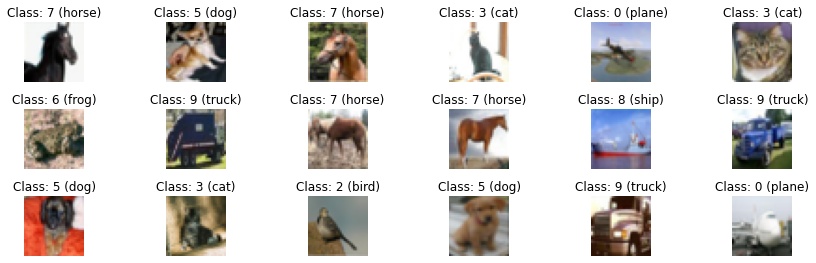

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,4))
for i in range(18):
    idx = np.random.randint(7500)
    label = Ytrain[idx,0]
    
    plt.subplot(3,6,i+1)
    plt.tight_layout()
    plt.imshow(Xtrain[idx])
    plt.title("Class: {} ({})".format(label, classes[label]))
    plt.axis('off')
plt.show()

##   Part 7: Split data into training, validation and testing
Split your training data into training (Xtrain, Ytrain) and validation (Xval, Yval), so that we have training, validation and test datasets (as in the previous laboration). We use a function in scikit learn. Use 25% of the data for validation.

https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

In [ ]:
from sklearn.model_selection import train_test_split


Xtrain, Xval, Ytrain, Yval = train_test_split(
  Xtrain, Ytrain, test_size=0.25, random_state=42)


print('Xtrain has size {}.'.format(Xtrain.shape))
print('Ytrain has size {}.'.format(Ytrain.shape))

print('Xval has size {}.'.format(Xval.shape))
print('Yval has size {}.'.format(Yval.shape))

# Print the size of training data, validation data and test data


Xtrain has size (7500, 32, 32, 3).
Ytrain has size (7500, 1).
Xval has size (2500, 32, 32, 3).
Yval has size (2500, 1).


##  Part 8: Preprocessing of images

Lets perform some preprocessing. The images are stored as uint8, i.e. 8 bit unsigned integers, but need to be converted to 32 bit floats. We also make sure that the range is -1 to 1, instead of 0 - 255. This cell is already finished.

In [ ]:
# Convert datatype for Xtrain, Xval, Xtest, to float32
Xtrain = Xtrain.astype('float32')
Xval = Xval.astype('float32')
Xtest = Xtest.astype('float32')

# Change range of pixel values to [-1,1]
Xtrain = Xtrain / 127.5 - 1
Xval = Xval / 127.5 - 1
Xtest = Xtest / 127.5 - 1

##  Part 9: Preprocessing of labels

The labels (Y) need to be converted from e.g. '4' to "hot encoded", i.e. to a vector of type [0, 0, 0, 1, 0, 0, 0, 0, 0, 0] . We use a function in Keras, see https://keras.io/api/utils/python_utils/#to_categorical-function

In [ ]:
from tensorflow.keras.utils import to_categorical

# Print shapes before converting the labels
print(Yval.shape)
print(Ytrain.shape)
print(Ytest.shape)

# Your code for converting Ytrain, Yval, Ytest to categorical

Yval = to_categorical(Yval)
Ytrain = to_categorical(Ytrain)
Ytest = to_categorical(Ytest)

# Print shapes after converting the labels

print(Yval.shape)
print(Ytrain.shape)
print(Ytest.shape)



(2500, 1)
(7500, 1)
(2000, 1)
(2500, 10)
(7500, 10)
(2000, 10)


##  Part 10: 2D CNN
Finish this code to create the image classifier, using a 2D CNN. Each convolutional layer will contain 2D convolution, batch normalization and max pooling. After the convolutional layers comes a flatten layer and a number of intermediate dense layers. The convolutional layers should take the number of filters as an argument, use a kernel size of 3 x 3, 'same' padding, and relu activation functions. The number of filters will double with each convolutional layer. The max pooling layers should have a pool size of 2 x 2. The intermediate dense layers before the final dense layer should take the number of nodes as an argument, use relu activation functions, and be followed by batch normalization. The final dense layer should have 10 nodes (= the number of classes in this laboration) and 'softmax' activation. Here we start with the Adam optimizer.

Relevant functions are

`model.add()`, adds a layer to the network

`Dense()`, a dense network layer

`Conv2D()`, performs 2D convolutions with a number of filters with a certain size (e.g. 3 x 3). 

`BatchNormalization()`, perform batch normalization

`MaxPooling2D()`, saves the max for a given pool size, results in down sampling

`Flatten()`, flatten a multi-channel tensor into a long vector

`model.compile()`, compile the model, add " metrics=['accuracy'] " to print the classification accuracy during the training

See https://keras.io/api/layers/core_layers/dense/ and https://keras.io/api/layers/reshaping_layers/flatten/ for information on how the `Dense()` and `Flatten()` functions work

See https://keras.io/layers/convolutional/ for information on how `Conv2D()` works

See https://keras.io/layers/pooling/ for information on how `MaxPooling2D()` works

Import a relevant cost function for multi-class classification from keras.losses (https://keras.io/losses/)

See the following links for how to compile, train and evaluate the model

https://keras.io/api/models/model_training_apis/#compile-method

https://keras.io/api/models/model_training_apis/#fit-method

https://keras.io/api/models/model_training_apis/#evaluate-method

In [ ]:
from keras.models import Sequential, Model
from keras.layers import Input, Conv2D, BatchNormalization, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from keras.losses import CategoricalCrossentropy

# Set seed from random number generator, for better comparisons
from numpy.random import seed
seed(123)

def build_CNN(input_shape, n_conv_layers=2, n_filters=16, n_dense_layers=0, n_nodes=50, use_dropout=False, learning_rate=0.01):

    # Setup a sequential model
    model = Sequential()

    # Add first convolutional layer to the model, requires input shape
    model.add(Conv2D(filters = n_filters, kernel_size = (3, 3), activation='relu', input_shape = input_shape, padding = "same"))
    model.add(BatchNormalization())
    model.add(MaxPooling2D((2, 2)))

    




    # Add remaining convolutional layers to the model, the number of filters should increase a factor 2 for each layer
    for i in range(n_conv_layers-1):
      n_filters = n_filters * 2
      model.add(Conv2D(filters = n_filters, kernel_size = (3, 3), activation='relu', padding = "same"))
      model.add(BatchNormalization())
      model.add(MaxPooling2D((2, 2)))


    # Add flatten layer
    model.add(Flatten())
    
    # Add intermediate dense layers
    for i in range(n_dense_layers):
      model.add(Dense(n_nodes, activation='relu'))
      model.add(BatchNormalization())
      if use_dropout == True:
        model.add(Dropout(.5))


    # Add final dense layer
    model.add(Dense(10, activation = 'softmax'))
   
    # Compile model
    model.compile(
        optimizer = Adam(learning_rate = learning_rate),
        metrics = ['accuracy'],
        loss = CategoricalCrossentropy(),
        )
    
    return model


In [ ]:
# Lets define a help function for plotting the training results
import matplotlib.pyplot as plt
def plot_results(history):
    
    loss = history.history['loss']
    acc = history.history['accuracy']
    val_loss = history.history['val_loss']
    val_acc = history.history['val_accuracy']
    
    plt.figure(figsize=(10,4))
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.plot(loss)
    plt.plot(val_loss)
    plt.legend(['Training','Validation'])

    plt.figure(figsize=(10,4))
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.plot(acc)
    plt.plot(val_acc)
    plt.legend(['Training','Validation'])

    plt.show()

## Part 11: Train 2D CNN

Time to train the 2D CNN, start with 2 convolutional layers, no intermediate dense layers, learning rate = 0.01. The first convolutional layer should have 16 filters (which means that the second convolutional layer will have 32 filters).

Relevant functions

`build_CNN`, the function we defined in Part 10, call it with the parameters you want to use

`model.fit()`, train the model with some training data

`model.evaluate()`, apply the trained model to some test data

See the following links for how to train and evaluate the model

https://keras.io/api/models/model_training_apis/#fit-method

https://keras.io/api/models/model_training_apis/#evaluate-method

## 2 convolutional layers, no intermediate dense layers

In [ ]:
# Setup some training parameters
batch_size = 100
epochs = 20
input_shape = (32, 32, 3)

# Build model
model1 = build_CNN(input_shape, n_conv_layers=2, n_filters=16, n_dense_layers=0, learning_rate=0.01)

# Train the model  using training data and validation data
  history1 = model1.fit(x = Xtrain, y = Ytrain, batch_size = batch_size, epochs=epochs, validation_data=(Xval, Yval))


Epoch 1/20
75/75 [==============================] - 12s 147ms/step - loss: 2.9497 - accuracy: 0.3304 - val_loss: 2.2886 - val_accuracy: 0.2300
Epoch 2/20
75/75 [==============================] - 9s 121ms/step - loss: 1.5825 - accuracy: 0.4763 - val_loss: 1.6704 - val_accuracy: 0.4048
Epoch 3/20
75/75 [==============================] - 9s 118ms/step - loss: 1.2578 - accuracy: 0.5537 - val_loss: 1.5463 - val_accuracy: 0.4324
Epoch 4/20
75/75 [==============================] - 9s 119ms/step - loss: 1.1156 - accuracy: 0.6033 - val_loss: 1.4589 - val_accuracy: 0.4912
Epoch 5/20
75/75 [==============================] - 9s 118ms/step - loss: 0.9955 - accuracy: 0.6484 - val_loss: 1.3130 - val_accuracy: 0.5424
Epoch 6/20
75/75 [==============================] - 9s 120ms/step - loss: 0.8981 - accuracy: 0.6855 - val_loss: 1.3051 - val_accuracy: 0.5536
Epoch 7/20
75/75 [==============================] - 9s 119ms/step - loss: 0.8140 - accuracy: 0.7115 - val_loss: 1.4605 - val_accuracy: 0.5416
Epoch

In [ ]:
# Evaluate the trained model on test set, not used in training or validation
score = model1.evaluate(x = Xtest, y = Ytest)
print('Test loss: %.4f' % score[0])
print('Test accuracy: %.4f' % score[1])

63/63 [==============================] - 1s 18ms/step - loss: 2.7207 - accuracy: 0.5485
Test loss: 2.7207
Test accuracy: 0.5485


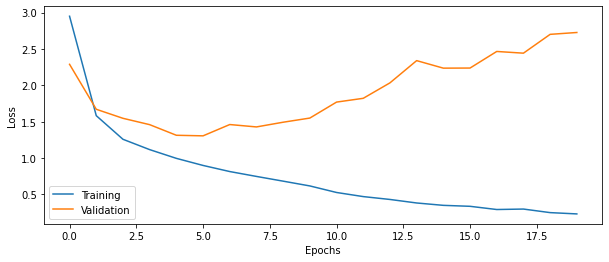

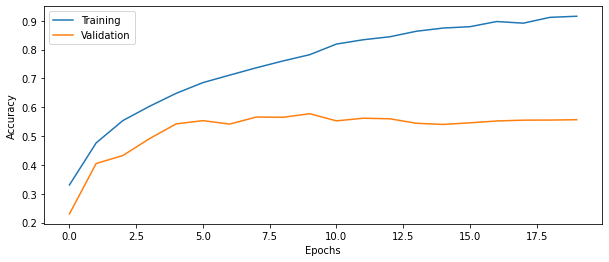

In [ ]:
# Plot the history from the training run
plot_results(history1)


## Part 12: Improving performance

Write down the test accuracy, are you satisfied with the classifier performance (random chance is 10%) ? 

Question 10: How big is the difference between training and test accuracy?


the difference between training and test accuracy is around 45%

Question 11: For the DNN laboration we used a batch size of 10,000, why do we need to use a smaller batch size in this laboration?
*   The the number of trainable parameters in cnn is relatively high 

## 2 convolutional layers, 1 intermediate dense layer (50 nodes)

In [ ]:
# Setup some training parameters
batch_size = 100
epochs = 20
input_shape = (32, 32, 3)

# Build model
model2 = build_CNN(input_shape, n_conv_layers=2, n_filters=16, n_dense_layers=1, n_nodes = 50, learning_rate=0.01)

# Train the model  using training data and validation data
history2 = model2.fit(x = Xtrain, y = Ytrain, batch_size = batch_size, epochs=epochs, validation_data=(Xval, Yval))

# .....

Epoch 1/20
75/75 [==============================] - 14s 174ms/step - loss: 1.6472 - accuracy: 0.4177 - val_loss: 1.7088 - val_accuracy: 0.3896
Epoch 2/20
75/75 [==============================] - 11s 145ms/step - loss: 1.2829 - accuracy: 0.5449 - val_loss: 1.8583 - val_accuracy: 0.3432
Epoch 3/20
75/75 [==============================] - 9s 122ms/step - loss: 1.0937 - accuracy: 0.6017 - val_loss: 1.6312 - val_accuracy: 0.4292
Epoch 4/20
75/75 [==============================] - 9s 122ms/step - loss: 0.9054 - accuracy: 0.6785 - val_loss: 1.5525 - val_accuracy: 0.4920
Epoch 5/20
75/75 [==============================] - 10s 139ms/step - loss: 0.7211 - accuracy: 0.7415 - val_loss: 1.4392 - val_accuracy: 0.5528
Epoch 6/20
75/75 [==============================] - 9s 121ms/step - loss: 0.5478 - accuracy: 0.8048 - val_loss: 1.5911 - val_accuracy: 0.5580
Epoch 7/20
75/75 [==============================] - 10s 128ms/step - loss: 0.4015 - accuracy: 0.8641 - val_loss: 1.8183 - val_accuracy: 0.5612
Ep

In [ ]:
# Evaluate the trained model on test set, not used in training or validation
score = model2.evaluate(x = Xtest, y = Ytest)
print('Test loss: %.4f' % score[0])
print('Test accuracy: %.4f' % score[1])

63/63 [==============================] - 1s 14ms/step - loss: 3.0264 - accuracy: 0.5605
Test loss: 3.0264
Test accuracy: 0.5605


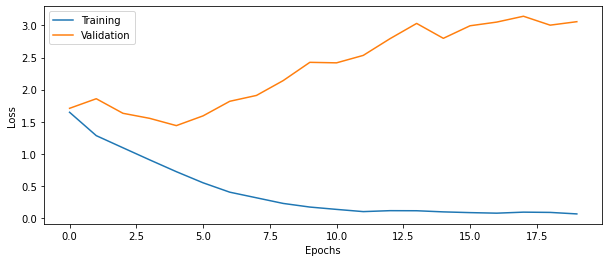

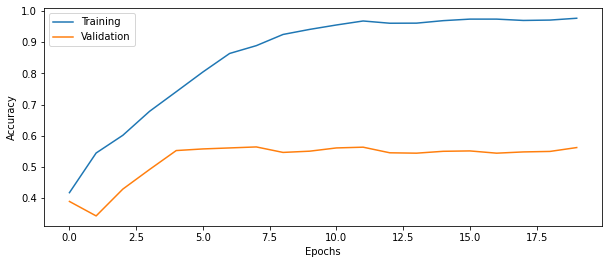

In [ ]:
# Plot the history from the training run
plot_results(history2)

## 4 convolutional layers, 1 intermediate dense layer (50 nodes)

In [ ]:
# Setup some training parameters
batch_size = 100
epochs = 20
input_shape = (32 , 32 ,3 )

# Build model
model3 = build_CNN(input_shape, n_conv_layers=4, n_filters=16, n_dense_layers=1, n_nodes = 50, learning_rate=0.01)

# Train the model  using training data and validation data
history3 =  model3.fit(x = Xtrain, y = Ytrain, batch_size = batch_size, epochs=epochs, validation_data=(Xval, Yval))

Epoch 1/20
75/75 [==============================] - 15s 172ms/step - loss: 1.7561 - accuracy: 0.3613 - val_loss: 1.8433 - val_accuracy: 0.3796
Epoch 2/20
75/75 [==============================] - 13s 168ms/step - loss: 1.3949 - accuracy: 0.4881 - val_loss: 1.4743 - val_accuracy: 0.4796
Epoch 3/20
75/75 [==============================] - 12s 167ms/step - loss: 1.2262 - accuracy: 0.5555 - val_loss: 1.8916 - val_accuracy: 0.4496
Epoch 4/20
75/75 [==============================] - 12s 166ms/step - loss: 1.0416 - accuracy: 0.6183 - val_loss: 1.3590 - val_accuracy: 0.5660
Epoch 5/20
75/75 [==============================] - 13s 167ms/step - loss: 0.9127 - accuracy: 0.6731 - val_loss: 1.5599 - val_accuracy: 0.5412
Epoch 6/20
75/75 [==============================] - 13s 167ms/step - loss: 0.7355 - accuracy: 0.7419 - val_loss: 1.5960 - val_accuracy: 0.5576
Epoch 7/20
75/75 [==============================] - 13s 167ms/step - loss: 0.6137 - accuracy: 0.7836 - val_loss: 1.6955 - val_accuracy: 0.5560

In [ ]:
# Evaluate the trained model on test set, not used in training or validation
score = model3.evaluate(x = Xtest, y = Ytest)
print('Test loss: %.4f' % score[0])
print('Test accuracy: %.4f' % score[1])

63/63 [==============================] - 1s 17ms/step - loss: 2.7330 - accuracy: 0.5770
Test loss: 2.7330
Test accuracy: 0.5770


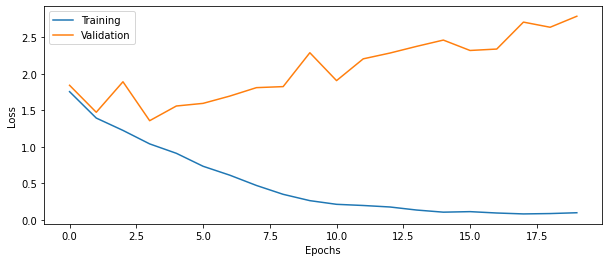

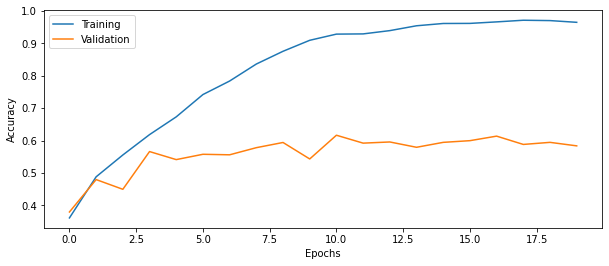

In [ ]:
# Plot the history from the training run
plot_results(history3)

##  Part 13: Plot the CNN architecture

To understand your network better, print the architecture using `model.summary()`

Question 12: How many trainable parameters does your network have? Which part of the network contains most of the parameters?
*   Trainable params: 124,180

Question 13: What is the input to and output of a Conv2D layer? What are the dimensions of the input and output? 
*   Input has 4D array with a shape of (batch_size, height, width, depth),
*   Output also has a 4D array with same batch size but the dimention of image changes depending on filter or kernal 

Question 14: Is the batch size always the first dimension of each 4D tensor? Check the documentation for Conv2D, https://keras.io/layers/convolutional/
*   Yes

Question 15: If a convolutional layer that contains 128 filters is applied to an input with 32 channels, what is the number of channels in the output?
*   128

Question 16: Why is the number of parameters in each Conv2D layer *not* equal to the number of filters times the number of filter coefficients per filter (plus biases)?
*   The reason for that would be that there is different data for each channels.



Question 17: How does MaxPooling help in reducing the number of parameters to train?

*  Since max-pooling selects a maximum value from the region so after the max-pooling only prominent features are selected thus reducing the parameter


In [ ]:
# Print network architecture

model3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 32, 32, 16)        448       
                                                                 
 batch_normalization_5 (Batc  (None, 32, 32, 16)       64        
 hNormalization)                                                 
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 16, 16, 16)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 16, 16, 32)        4640      
                                                                 
 batch_normalization_6 (Batc  (None, 16, 16, 32)       128       
 hNormalization)                                                 
                                                      

##  Part 14: Dropout regularization

Add dropout regularization to each intermediate dense layer, dropout probability 50%.

Question 18: How much did the test accuracy improve with dropout, compared to without dropout?
*   After using the dropout the accuracy is around 59%, which was around 57% without dropout


Question 19: What other types of regularization can be applied? How can you add L2 regularization for the convolutional layers?
*   We can apply L1, L2 and L1L2 regularization
*   To add regularization for convolution layer we can use `kernel_regularizer` parameter. The code for that would be
```
model.add(Conv2D(filters = n_filters, kernel_size = (3, 3), activation='relu', padding = "same", kernel_regularizer=l2(0.01)))
```


## 4 convolutional layers, 1 intermediate dense layer (50 nodes), dropout

In [ ]:
# Setup some training parameters
batch_size = 100
epochs = 20
input_shape = (32 ,32 ,3)

# Build model
model4 = build_CNN(input_shape, n_conv_layers=4, n_filters=16, n_dense_layers=1, n_nodes = 50, learning_rate=0.01 , use_dropout= True)

# Train the model  using training data and validation data
history4 =  model4.fit(x = Xtrain, y = Ytrain, batch_size = batch_size, epochs=epochs, validation_data=(Xval, Yval))

Epoch 1/20
75/75 [==============================] - 12s 27ms/step - loss: 2.0438 - accuracy: 0.2813 - val_loss: 1.8437 - val_accuracy: 0.3384
Epoch 2/20
75/75 [==============================] - 2s 20ms/step - loss: 1.5967 - accuracy: 0.4048 - val_loss: 1.9011 - val_accuracy: 0.3336
Epoch 3/20
75/75 [==============================] - 2s 20ms/step - loss: 1.4341 - accuracy: 0.4680 - val_loss: 1.6055 - val_accuracy: 0.4488
Epoch 4/20
75/75 [==============================] - 2s 21ms/step - loss: 1.3209 - accuracy: 0.5184 - val_loss: 1.5448 - val_accuracy: 0.4972
Epoch 5/20
75/75 [==============================] - 2s 21ms/step - loss: 1.1972 - accuracy: 0.5671 - val_loss: 1.4572 - val_accuracy: 0.5036
Epoch 6/20
75/75 [==============================] - 2s 21ms/step - loss: 1.1079 - accuracy: 0.6055 - val_loss: 1.5246 - val_accuracy: 0.5256
Epoch 7/20
75/75 [==============================] - 2s 20ms/step - loss: 0.9746 - accuracy: 0.6489 - val_loss: 1.5523 - val_accuracy: 0.5084
Epoch 8/20
7

In [ ]:
# Evaluate the trained model on test set, not used in training or validation
score = model4.evaluate(x = Xtest, y = Ytest)
print('Test loss: %.4f' % score[0])
print('Test accuracy: %.4f' % score[1])

63/63 [==============================] - 1s 7ms/step - loss: 2.2109 - accuracy: 0.5925
Test loss: 2.2109
Test accuracy: 0.5925


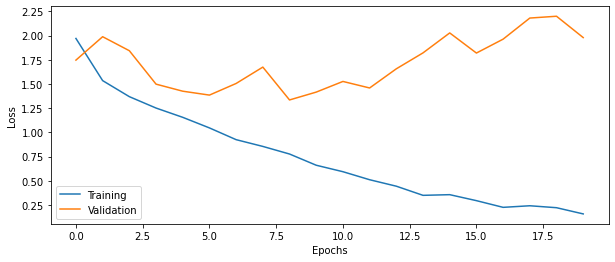

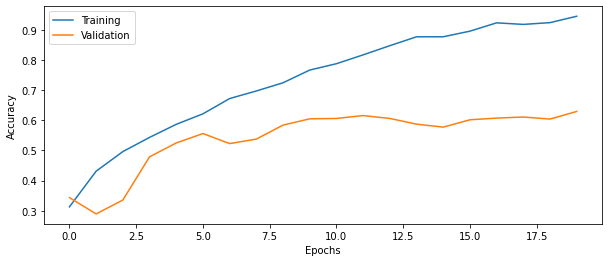

In [ ]:
# Plot the history from the training run
plot_results(history4)

##  Part 15: Tweaking performance

You have now seen the basic building blocks of a 2D CNN. To further improve performance involves changing the number of convolutional layers, the number of filters per layer, the number of intermediate dense layers, the number of nodes in the intermediate dense layers, batch size, learning rate, number of epochs, etc. Spend some time (30 - 90 minutes) testing different settings.

Question 20: How high test accuracy can you obtain? What is your best configuration?

*   test accuracy: 0.6000
*   We have increased epochs


## Your best config

In [ ]:
# Setup some training parameters
batch_size = 100
epochs = 20
input_shape = (32 ,32 ,3)

# Build model
model5 = build_CNN(input_shape, n_conv_layers=4, n_filters=24, n_dense_layers=1, n_nodes = 50, learning_rate=0.001 , use_dropout= True)

# Train the model  using training data and validation data
history5 = model5.fit(x = Xtrain, y = Ytrain, batch_size = batch_size, epochs=epochs, validation_data=(Xval, Yval))

Epoch 1/20
75/75 [==============================] - 4s 28ms/step - loss: 2.2157 - accuracy: 0.3015 - val_loss: 2.5226 - val_accuracy: 0.1172
Epoch 2/20
75/75 [==============================] - 2s 23ms/step - loss: 1.6095 - accuracy: 0.4339 - val_loss: 2.7759 - val_accuracy: 0.1448
Epoch 3/20
75/75 [==============================] - 2s 23ms/step - loss: 1.3612 - accuracy: 0.5196 - val_loss: 2.7020 - val_accuracy: 0.1632
Epoch 4/20
75/75 [==============================] - 2s 22ms/step - loss: 1.1559 - accuracy: 0.5961 - val_loss: 2.4014 - val_accuracy: 0.1616
Epoch 5/20
75/75 [==============================] - 2s 22ms/step - loss: 1.0177 - accuracy: 0.6445 - val_loss: 1.8395 - val_accuracy: 0.3400
Epoch 6/20
75/75 [==============================] - 2s 23ms/step - loss: 0.8598 - accuracy: 0.7073 - val_loss: 1.4373 - val_accuracy: 0.5016
Epoch 7/20
75/75 [==============================] - 2s 22ms/step - loss: 0.7121 - accuracy: 0.7629 - val_loss: 1.2537 - val_accuracy: 0.5744
Epoch 8/20
75

In [ ]:
# Evaluate the trained model on test set, not used in training or validation

score = model5.evaluate(x = Xtest, y = Ytest)
print('Test loss: %.4f' % score[0])
print('Test accuracy: %.4f' % score[1])

63/63 [==============================] - 1s 7ms/step - loss: 1.6735 - accuracy: 0.6000
Test loss: 1.6735
Test accuracy: 0.6000


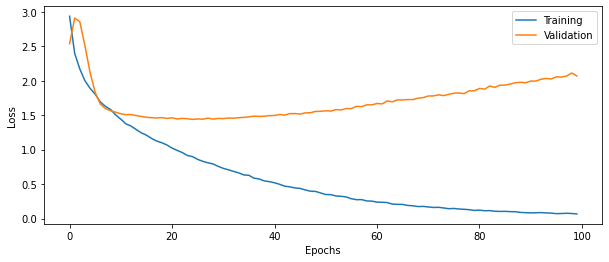

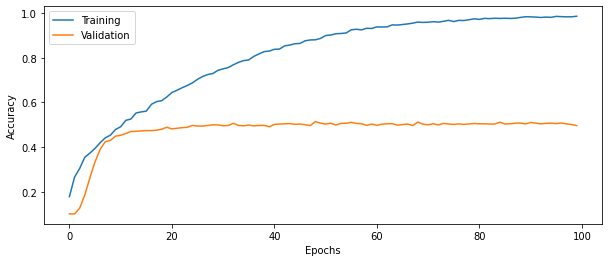

In [ ]:
# Plot the history from the training run
plot_results(history5)

##  Part 16: Rotate the test images

How high is the test accuracy if we rotate the test images? In other words, how good is the CNN at generalizing to rotated images?

Rotate each test image 90 degrees, the cells are already finished.

Question 21: What is the test accuracy for rotated test images, compared to test images without rotation? Explain the difference in accuracy.

With the rotated test images we get a test accuracy of 23%. There is a 37% difference in accuracy between the rotated and the non rotated images. The reason for this difference is that the model is trained on the non rotated images. So when we flip the images and then check the accuracy on these images the model has not been trained on this data. If we were to train the model on the rotated images we would get better results. 

In [ ]:
def myrotate(images):

    images_rot = np.rot90(images, axes=(1,2))
    
    return images_rot

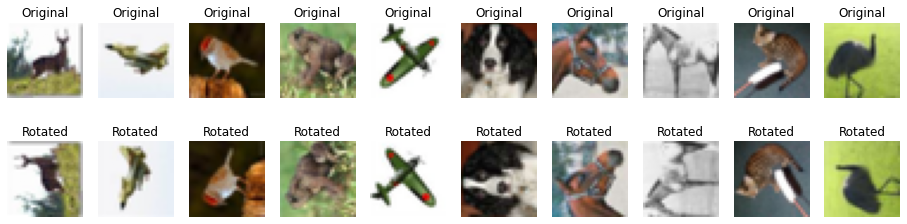

In [ ]:
# Rotate the test images 90 degrees
Xtest_rotated = myrotate(Xtest)

# Look at some rotated images
plt.figure(figsize=(16,4))
for i in range(10):
    idx = np.random.randint(500)
    
    plt.subplot(2,10,i+1)
    plt.imshow(Xtest[idx]/2+0.5)
    plt.title("Original")
    plt.axis('off')
    
    plt.subplot(2,10,i+11)
    plt.imshow(Xtest_rotated[idx]/2+0.5)
    plt.title("Rotated")
    plt.axis('off')
plt.show()


In [ ]:
# Evaluate the trained model on rotated test set
score = model4.evaluate(x = Xtest_rotated, y = Ytest)
print('Test loss: %.4f' % score[0])
print('Test accuracy: %.4f' % score[1])

63/63 [==============================] - 1s 18ms/step - loss: 6.1726 - accuracy: 0.2300
Test loss: 6.1726
Test accuracy: 0.2300


##  Part 17: Augmentation using Keras `ImageDataGenerator`

We can increase the number of training images through data augmentation (we now ignore that CIFAR10 actually has 60 000 training images). Image augmentation is about creating similar images, by performing operations such as rotation, scaling, elastic deformations and flipping of existing images. This will prevent overfitting, especially if all the training images are in a certain orientation.

We will perform the augmentation on the fly, using a built-in function in Keras, called `ImageDataGenerator`

See https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image/ImageDataGenerator , the .flow(x,y) functionality

In [ ]:
# Get all 60 000 training images again. ImageDataGenerator manages validation data on its own
(Xtrain, Ytrain), (Xtest, Ytest) = cifar10.load_data()

# Reduce number of images to 10,000
Xtrain = Xtrain[0:10000]
Ytrain = Ytrain[0:10000]

# Change data type and rescale range
Xtrain = Xtrain.astype('float32')
Xtrain = Xtrain / 127.5 - 1

# Convert labels to hot encoding
Ytrain = to_categorical(Ytrain, 10)

In [ ]:
# Set up a data generator with on-the-fly data augmentation, 20% validation split
# Use a rotation range of 30 degrees, horizontal and vertical flipping
from keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(
    featurewise_center=False,
    featurewise_std_normalization=False,
    rotation_range=30,
    horizontal_flip = True,
    vertical_flip=True,
    validation_split=0.2)




# Setup a flow for training data, assume that we can fit all images into CPU memory
Training_itterator = datagen.flow(Xtrain , Ytrain , batch_size =  batch_size, subset='training')
# Train the model  using training data and validation data



# Setup a flow for validation data, assume that we can fit all images into CPU memory
Validation_Itterator = datagen.flow(Xtrain , Ytrain , batch_size = batch_size, subset='validation')

## Part 18: What about big data?

Question 22: How would you change the code for the image generator if you cannot fit all training images in CPU memory? What is the disadvantage of doing that change?

One thing we could do is to feed a smaller number of images from a folder to the generator this would decrease the number of images that has to be held in memory. We could also reduce the size of the images. The problem with the first solution would be that this would increase the training time of the model. For the second supposed solution decreasing the size might result in information in the image being loss which would not be good. 

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

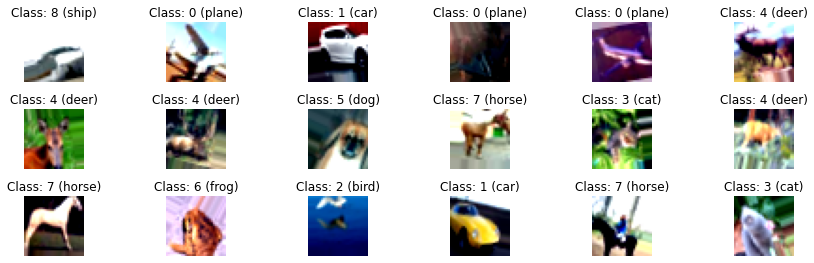

In [ ]:
# Plot some augmented images
plot_datagen = datagen.flow(Xtrain, Ytrain, batch_size=1)

plt.figure(figsize=(12,4))
for i in range(18):
    (im, label) = plot_datagen.next()
    im = (im[0] + 1) * 127.5
    im = im.astype('int')
    label = np.flatnonzero(label)[0]
    
    plt.subplot(3,6,i+1)
    plt.tight_layout()
    plt.imshow(im)
    plt.title("Class: {} ({})".format(label, classes[label]))
    plt.axis('off')
plt.show()

## Part 19: Train the CNN with images from the generator

See https://keras.io/api/models/model_training_apis/#fit-method for how to use model.fit with a generator instead of a fix dataset (numpy arrays)

To make the comparison fair to training without augmentation

    steps_per_epoch should be set to: len(Xtrain)*(1 - validation_split)/batch_size

    validation_steps should be set to: len(Xtrain)*validation_split/batch_size

Question 23: How quickly is the training accuracy increasing compared to without augmentation? Explain why there is a difference compared to without augmentation. What parameter is necessary to change to perform more training?

The model learns quite a bit quicker starting out if we look at the plots below. One reason for this might be that the augmentation reduces overfitting and this leads to the model learning quicker. 

Question 24: What other types of image augmentation can be applied, compared to what we use here? 

We could also use augmentation where we flip the image basically mirroring the image, this would lead to everything in the image changing place to the other side. We could also do things such as augment the image to be upside down. 

In [ ]:
# Setup some training parameters
batch_size = 100
epochs = 200
input_shape = (32,32,3)

# Build model (your best config)
model6 = build_CNN(input_shape, n_conv_layers=4, n_filters=16, n_dense_layers=1, n_nodes = 100, learning_rate=0.001 , use_dropout= False)

validation_split=0.2
    
# Train the model using on the fly augmentation
history6 = history6 = model6.fit(Training_itterator, validation_data = Validation_Itterator, steps_per_epoch = len(Xtrain)*(1 - validation_split)/batch_size,
                      validation_steps = len(Xtrain)*validation_split/batch_size, batch_size = batch_size, epochs = epochs)

Epoch 1/200
60/60 [==============================] - 6s 89ms/step - loss: 1.9872 - accuracy: 0.3010 - val_loss: 2.5142 - val_accuracy: 0.1107
Epoch 2/200
60/60 [==============================] - 4s 75ms/step - loss: 1.6571 - accuracy: 0.4012 - val_loss: 3.0298 - val_accuracy: 0.1000
Epoch 3/200
60/60 [==============================] - 4s 74ms/step - loss: 1.5564 - accuracy: 0.4327 - val_loss: 3.1777 - val_accuracy: 0.1013
Epoch 4/200
60/60 [==============================] - 4s 74ms/step - loss: 1.4815 - accuracy: 0.4698 - val_loss: 3.1196 - val_accuracy: 0.1240
Epoch 5/200
60/60 [==============================] - 5s 83ms/step - loss: 1.4227 - accuracy: 0.4830 - val_loss: 2.6095 - val_accuracy: 0.1793
Epoch 6/200
60/60 [==============================] - 5s 83ms/step - loss: 1.3999 - accuracy: 0.4925 - val_loss: 1.9555 - val_accuracy: 0.3187
Epoch 7/200
60/60 [==============================] - 5s 82ms/step - loss: 1.3590 - accuracy: 0.5135 - val_loss: 1.7222 - val_accuracy: 0.4167
Epoch 

In [ ]:
# Check if there is still a big difference in accuracy for original and rotated test images

# Evaluate the trained model on original test set
score = model6.evaluate(Xtest, Ytest, batch_size = batch_size, verbose=0)
print('Test loss: %.4f' % score[0])
print('Test accuracy: %.4f' % score[1])

# Evaluate the trained model on rotated test set
score = model6.evaluate(Xtest_rotated, Ytest, batch_size = batch_size, verbose=0)
print('Test loss: %.4f' % score[0])
print('Test accuracy: %.4f' % score[1])

Test loss: 1.7431
Test accuracy: 0.6245
Test loss: 3.8990
Test accuracy: 0.3165


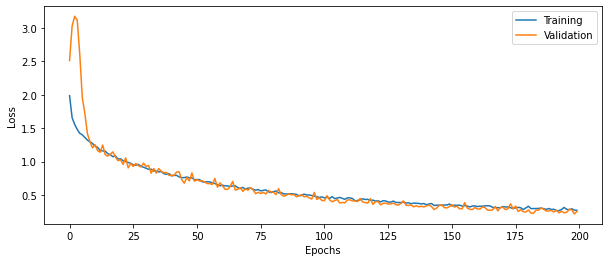

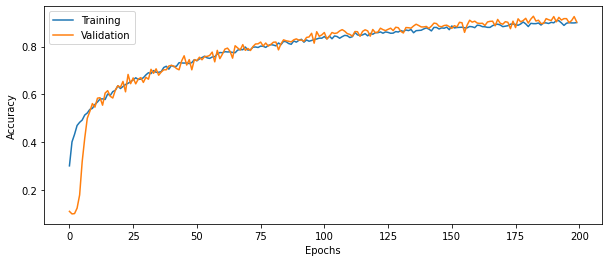

In [ ]:
# Plot the history from the training run
plot_results(history6)

## Part 20: Plot misclassified images

Lets plot some images where the CNN performed badly, these cells are already finished.

In [ ]:
# Find misclassified images
y_pred=model6.predict(Xtest) 
y_pred=np.argmax(y_pred,axis=1)

y_correct = np.argmax(Ytest,axis=-1)

miss = np.flatnonzero(y_correct != y_pred)

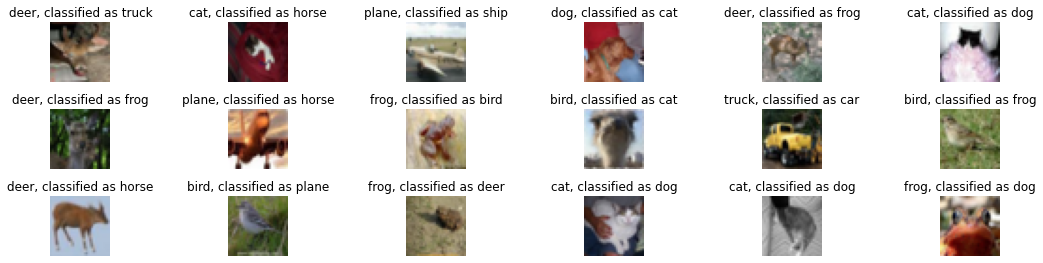

In [ ]:
# Plot a few of them
plt.figure(figsize=(15,4))
perm = np.random.permutation(miss)
for i in range(18):
    im = (Xtest[perm[i]] + 1) * 127.5
    im = im.astype('int')
    label_correct = y_correct[perm[i]]
    label_pred = y_pred[perm[i]]
    
    plt.subplot(3,6,i+1)
    plt.tight_layout()
    plt.imshow(im)
    plt.axis('off')
    plt.title("{}, classified as {}".format(classes[label_correct], classes[label_pred]))
plt.show()

##  Part 21: Testing on another size

Question 25: This CNN has been trained on 32 x 32 images, can it be applied to images of another size? If not, why is this the case?

Yes we can. However, we need to apply padding to the new images to get them in the correct sizing. 

Question 26: Is it possible to design a CNN that can be trained on images of one size, and then applied to an image of any size? How?

What we can do is re-shape the images. Then we would need to re-shape them into the size of the smallest image in the set. 

##  Part 22: Pre-trained 2D CNNs

There are many deep 2D CNNs that have been pre-trained using the large ImageNet database (several million images, 1000 classes). Import a pre-trained ResNet50 network from Keras applications. Show the network using `model.summary()`

Question 27: How many convolutional layers does ResNet50 have? 

It har 48 convolutional layers. 

Question 28: How many trainable parameters does the ResNet50 network have? 

around 25 million parameters


Question 29: What is the size of the images that ResNet50 expects as input?

(224, 224, 3)



Question 30: Using the answer to question 28, explain why the second derivative is seldom used when training deep networks.





Apply the pre-trained CNN to 5 random color images that you download and copy to the cloud machine or your own computer. Are the predictions correct? How certain is the network of each image class?

These pre-trained networks can be fine tuned to your specific data, and normally only the last layers need to be re-trained, but it will still be too time consuming to do in this laboration.

See https://keras.io/api/applications/ and https://keras.io/api/applications/resnet/#resnet50-function 

Useful functions

`image.load_img` in tensorflow.keras.preprocessing

`image.img_to_array` in tensorflow.keras.preprocessing

`ResNet50` in tensorflow.keras.applications.resnet50

`preprocess_input` in tensorflow.keras.applications.resnet50

`decode_predictions` in tensorflow.keras.applications.resnet50

`expand_dims` in numpy


In [ ]:
# Your code for using pre-trained ResNet 50 on 5 color images of your choice.
import tensorflow.keras as Keras

from tensorflow.keras.applications.resnet50 import ResNet50

from keras.datasets import cifar10
import numpy as np

from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions
import numpy as np

ResModel = ResNet50(weights = "imagenet")
MyImages = ['Bird1.jpg', 'Dog1.jpg', 'bike1.jpg', 'bird2.jpg', 'horse1.jpg']


for i in MyImages:
  CurrentImage = image.load_img(str(i) , target_size = (224 , 224))
  CurrentImage = image.img_to_array(CurrentImage)
  CurrentImage = np.expand_dims(CurrentImage , axis = 0)
  CurrentImage = preprocess_input(CurrentImage)

  modelPrediction = ResModel.predict(CurrentImage)
   
  print("True class: ")
  print(i)
  print("Predicted class:")
  print(decode_predictions(modelPrediction, top=1)[0])




True class: 
Bird1.jpg
Predicted class:
49152/35363 [=========================================] - 0s 0us/step
[('n01530575', 'brambling', 0.94600624)]
True class: 
Dog1.jpg
Predicted class:
[('n02099601', 'golden_retriever', 0.9864249)]
True class: 
bike1.jpg
Predicted class:
[('n03792782', 'mountain_bike', 0.646531)]
True class: 
bird2.jpg
Predicted class:
[('n01795545', 'black_grouse', 0.21329415)]
True class: 
horse1.jpg
Predicted class:
[('n02389026', 'sorrel', 0.47139797)]


Above we can see the results for the pre-trained ResNet50 model that uses the imagenet weights. Something very interesting is that the ResNet model does not only predict the category, for example "bird". It predicts the species of birds. The same goes for the other categories. We provided it with pictures of two birds, a bike , a dog and a horse. It in turn returned the results we can see above. We are not experts on bird , dog or horse species but after googling these classifications seems to be correct, something that is highly impressive. 